In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [15]:
X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)

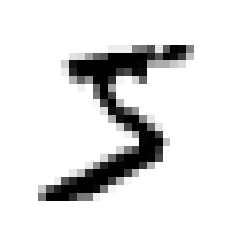

In [11]:
plt.imshow(X[0].reshape(28, 28), interpolation="nearest", cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

In [19]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:], 

In [20]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [22]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [69]:
from sklearn.model_selection import cross_val_predict, cross_val_score
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [32]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print(confusion_matrix(y_train_5, y_train_pred))
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))
print(f1_score(y_train_5, y_train_pred))

[[53892   687]
 [ 1891  3530]]
0.8370879772350012
0.6511713705958311
0.7325171197343846


In [41]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

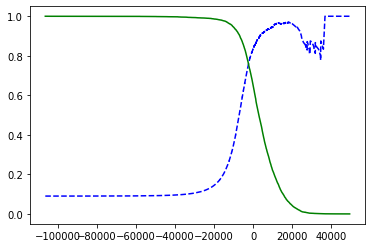

In [51]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall')

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

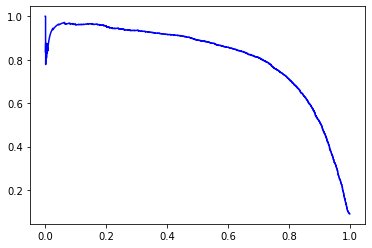

In [53]:
plt.plot(recalls, precisions, 'b-')
plt.show()

In [60]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]
y_train_pred_90 = (y_scores >= threshold_90_precision)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9000345901072293
0.4799852425751706


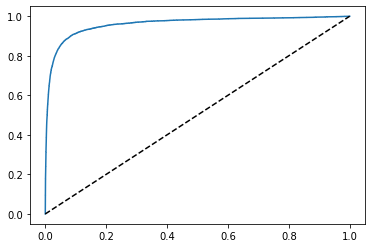

In [61]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1],  [0, 1], 'k--') # Plot the diagonal line

plot_roc_curve(fpr, tpr)
plt.show()

/Users/Lunar/miniconda3/envs/athena/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Lunar/miniconda3/envs/athena/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Lunar/miniconda3/envs/athena/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


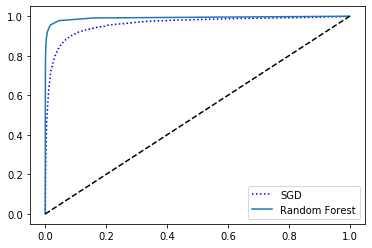

In [62]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, 'b:', label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [63]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict(X[0: 10])

array([3, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [64]:
some_digits_scores = sgd_clf.decision_function(X[0: 10])

In [70]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV] ................................................. , total= 1.6min
[CV]  ................................................................
[CV] ................................................. , total= 1.7min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.8min finished


array([0.87082583, 0.87089354, 0.88628294])

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

/Users/Lunar/miniconda3/envs/athena/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.89957009, 0.89344467, 0.89963495])

In [72]:
y_train_pred = sgd_clf.predict(X_train_scaled)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5473,   38,   23,    0,    1,  344,   10,   34,    0,    0],
       [   2, 6716,    1,    0,    0,   14,    0,    9,    0,    0],
       [ 314, 1807,  723,   10,   27, 2762,  111,  204,    0,    0],
       [  30, 1758,   10,  147,   10, 3675,   15,  486,    0,    0],
       [ 448, 1896,   16,    0,  457, 2508,   21,  494,    0,    2],
       [  31,  484,    2,    1,    2, 4834,   20,   46,    0,    1],
       [ 197, 1601,   57,    4,    0, 1357, 2695,    7,    0,    0],
       [  21,  265,    2,    3,    0,  132,    1, 5834,    0,    7],
       [  93, 2678,   10,    0,    0, 2933,    9,  128,    0,    0],
       [  86,  640,   10,    0,   11, 2834,    0, 2346,    0,   22]])

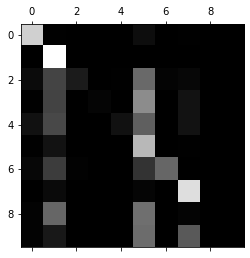

In [73]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

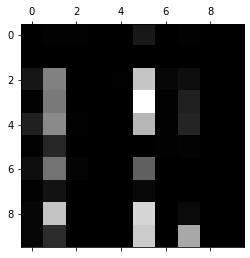

In [90]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [91]:
from sklearn.neighbors import KNeighborsClassifier
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mode = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [93]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

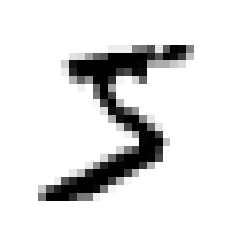

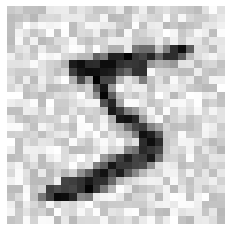

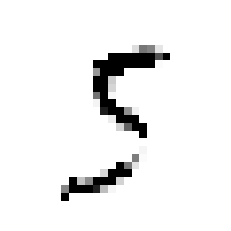

In [95]:
def plot_digit(X):
    plt.imshow(X.reshape(28, 28), interpolation="nearest", cmap=mpl.cm.binary)
    plt.axis('off')
    plt.show()
    
plot_digit(X_train[0])
plot_digit(X_train_mod[0])
plot_digit(knn_clf.predict(X_train_mod[:1]))